# Climate Effects on Food Supply

## Purpose

To provide an assessment of potential climate change impacts on world crop production.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium

# Aquiring the dataset

In [2]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vTCabKiSUGwqsWeuQyMGwlTPJDDOFm_iRcO9XqRm7OdRv3_dk6q1WbqQQDFHWYeqM6fo3TymabV4GlY/pub?output=xlsx"

In [3]:
data_dict = pd.read_excel(url, sheet_name="dictionary")
data_sheet = pd.read_excel(url, sheet_name="data")

In [4]:
data_dict.head()

,Data filenames,Example,Description
0,BLS_2_Countries_(SRES)_ABBREVNAME,Australia,country name
1,Fips_code,AS,country code
2,WH_2000,20069730.428571,wheat production average 2000 to 2006 in t (FAO)
3,RI_2000,891258.571429,rice production average 2000 to 2006 in t (FAO)
4,MZ_2000,367102.142857,maize production average 2000 to 2006 in t (FAO)


In [5]:
data_sheet.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-1.897207,-0.742603,-0.947242,-3.487529,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,1.584023,0.745699,0.398874,0.766314,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,1.141646,0.214081,0.564822,1.451985,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,AG,DZA,2157083.857143,300,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-1.598561,0.082848,0.047685,-3.424069,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,AGO,4000,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-4.352132,-1.812495,-2.531725,-6.431626,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_sheet.sort_values(by=['BLS_2_Countries_(SRES)_ABBREVNAME'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-1.897207,-0.742603,-0.947242,-3.487529,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,1.584023,0.745699,0.398874,0.766314,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,1.141646,0.214081,0.564822,1.451985,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,AG,DZA,2157083.857143,300,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-1.598561,0.082848,0.047685,-3.424069,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,AGO,4000,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-4.352132,-1.812495,-2.531725,-6.431626,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0,...,-0.074577,-0.029212,-0.041332,-0.095295,NaN,NaN,NaN,NaN,NaN,NaN
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.246569,-0.891412,-1.234413,-3.856785,NaN,NaN,NaN,NaN,NaN,NaN
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0,...,-0.094377,-0.008106,-0.049865,-0.070289,NaN,NaN,NaN,NaN,NaN,NaN
163,Zambia,ZA,ZMB,96884.428571,14301,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-4.477987,-0.67118,-2.582783,-3.675069,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_sheet.tail()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.246569,-0.891412,-1.234413,-3.856785,NaN,NaN,NaN,NaN,NaN,NaN
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0,...,-0.094377,-0.008106,-0.049865,-0.070289,NaN,NaN,NaN,NaN,NaN,NaN
163,Zambia,ZA,ZMB,96884.428571,14301,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-4.477987,-0.67118,-2.582783,-3.675069,NaN,NaN,NaN,NaN,NaN,NaN
164,Zimbabwe,ZI,ZWE,179285.714286,633.333333,1298482.142857,1.401237,-0.598763,-1.598763,2512.218297,...,-4.363947,-0.617682,-2.500486,-3.561029,NaN,NaN,NaN,NaN,NaN,NaN
165,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_sheet.shape

(166, 163)

In [9]:
data_sheet.columns

Index(['BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10', 'WH_2000',
       'RI_2000', 'MZ_2000', 'WHA1F2020', 'RIA1F2020', 'MZA1F2020',
       'ActChWHA1F2020',
       ...
       'B2A2080', 'B2B2020', 'B2B2050', 'B2B2080', 'Unnamed: 157',
       'Unnamed: 158', 'Unnamed: 159', 'Unnamed: 160', 'Unnamed: 161',
       'Unnamed: 162'],
      dtype='object', length=163)

# Identifying and handling the missing values

In [11]:
def convert_col_to_list(data):
    mylist = []
    for col in data.columns:
        mylist.append(col)
    return mylist

In [58]:
col_list = convert_col_to_list(data_sheet)
col_list

['BLS_2_Countries_(SRES)_ABBREVNAME',
 'Fips_code',
 'ISO3v10',
 'WH_2000',
 'RI_2000',
 'MZ_2000',
 'WHA1F2020',
 'RIA1F2020',
 'MZA1F2020',
 'ActChWHA1F2020',
 'ActChRIAIF2020',
 'ActChMZA1F2020',
 'WHA1F2050',
 'RIA1F2050',
 'MZA1F2050',
 'ActChWHA1F2050',
 'ActChRIAIF2050',
 'ActChMZA1F2050',
 'WHA1F2080',
 'RIA1F2080',
 'MZA1F2080',
 'ActChWHA1F2080',
 'ActChRIAIF2080',
 'ActChMZA1F2080',
 'WHA2a2020',
 'RIA2a2020',
 'MZA2a2020',
 'ActChWHA2a2020',
 'ActChRIA2a2020',
 'ActChMZA2a2020',
 'WHA2a2050',
 'RIA2a2050',
 'MZA2a2050',
 'ActChWHA2a2050',
 'ActChRIA2a2050',
 'ActChMZA2a2050',
 'WHA2a2080',
 'RIA2a2080',
 'MZA2a2080',
 'ActChWHA2a2080',
 'ActChRIA2a2080',
 'ActChMZA2a2080',
 'WHA2b2020',
 'RIA2b2020',
 'MZA2b2020',
 'ActCHWHA2b2020',
 'ActChRIA2b2020',
 'ActChMZA2b2020',
 'WHA2b2050',
 'RIA2b2050',
 'MZA2b2050',
 'ActCHWHA2b2050',
 'ActChRIA2b2050',
 'ActChMZA2b2050',
 'WHA2b2080',
 'RIA2b2080',
 'MZA2b2080',
 'ActChWHA2b2080',
 'ActChRIA2b2080',
 'ActChMZA2b2080',
 'WHA2c20

In [13]:
col_to_remove = ['BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10', 'COUNTRY']

In [14]:
excluded_col = list(set(col_list) - set(col_to_remove))

In [15]:
df_sheet = pd.DataFrame(data_sheet)

In [16]:
df_sheet  = df_sheet[:-1]

In [17]:
df_sheet.tail()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0,...,-0.074577,-0.029212,-0.041332,-0.095295,NaN,NaN,NaN,NaN,NaN,NaN
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.246569,-0.891412,-1.234413,-3.856785,NaN,NaN,NaN,NaN,NaN,NaN
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0,...,-0.094377,-0.008106,-0.049865,-0.070289,NaN,NaN,NaN,NaN,NaN,NaN
163,Zambia,ZA,ZMB,96884.428571,14301,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-4.477987,-0.67118,-2.582783,-3.675069,NaN,NaN,NaN,NaN,NaN,NaN
164,Zimbabwe,ZI,ZWE,179285.714286,633.333333,1298482.142857,1.401237,-0.598763,-1.598763,2512.218297,...,-4.363947,-0.617682,-2.500486,-3.561029,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_sheet.sort_values(by=['BLS_2_Countries_(SRES)_ABBREVNAME'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-1.897207,-0.742603,-0.947242,-3.487529,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,1.584023,0.745699,0.398874,0.766314,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,1.141646,0.214081,0.564822,1.451985,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,AG,DZA,2157083.857143,300,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-1.598561,0.082848,0.047685,-3.424069,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,AGO,4000,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-4.352132,-1.812495,-2.531725,-6.431626,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0,...,-0.074577,-0.029212,-0.041332,-0.095295,NaN,NaN,NaN,NaN,NaN,NaN
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.246569,-0.891412,-1.234413,-3.856785,NaN,NaN,NaN,NaN,NaN,NaN
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0,...,-0.094377,-0.008106,-0.049865,-0.070289,NaN,NaN,NaN,NaN,NaN,NaN
163,Zambia,ZA,ZMB,96884.428571,14301,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-4.477987,-0.67118,-2.582783,-3.675069,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data_sheet.isnull().sum()

BLS_2_Countries_(SRES)_ABBREVNAME      0
Fips_code                              0
ISO3v10                                0
WH_2000                               48
RI_2000                               57
                                    ... 
Unnamed: 158                         166
Unnamed: 159                         166
Unnamed: 160                         166
Unnamed: 161                           1
Unnamed: 162                         166
Length: 163, dtype: int64

In [19]:
def impute_missing_vals(data, col_list):
    for i in col_list:
        if data[i].isnull:
            data[i] = data[i].replace(np.nan, 0.0)
            data[i] = data[i].astype(float)
            data[i] = data[i].apply(lambda x: '%.5f' % x)

In [20]:
impute_missing_vals(df_sheet, excluded_col)

In [21]:
df_sheet.isnull().sum()

BLS_2_Countries_(SRES)_ABBREVNAME    0
Fips_code                            0
ISO3v10                              0
WH_2000                              0
RI_2000                              0
                                    ..
Unnamed: 158                         0
Unnamed: 159                         0
Unnamed: 160                         0
Unnamed: 161                         0
Unnamed: 162                         0
Length: 163, dtype: int64

In [22]:
df_sheet.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.85714,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-1.89721,-0.74260,-0.94724,-3.48753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Alaska (same as Canada),02,USA,0.00000,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,1.58402,0.74570,0.39887,0.76631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Albania,AL,ALB,274685.71429,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,1.14165,0.21408,0.56482,1.45198,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Algeria,AG,DZA,2157083.85714,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-1.59856,0.08285,0.04768,-3.42407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Angola,AO,AGO,4000.00000,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-4.35213,-1.81250,-2.53172,-6.43163,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [23]:
df2=df_sheet.head()

# Exploratory Data Analysis

In [24]:
df2.head()
df2.columns.values.tolist()

['BLS_2_Countries_(SRES)_ABBREVNAME',
 'Fips_code',
 'ISO3v10',
 'WH_2000',
 'RI_2000',
 'MZ_2000',
 'WHA1F2020',
 'RIA1F2020',
 'MZA1F2020',
 'ActChWHA1F2020',
 'ActChRIAIF2020',
 'ActChMZA1F2020',
 'WHA1F2050',
 'RIA1F2050',
 'MZA1F2050',
 'ActChWHA1F2050',
 'ActChRIAIF2050',
 'ActChMZA1F2050',
 'WHA1F2080',
 'RIA1F2080',
 'MZA1F2080',
 'ActChWHA1F2080',
 'ActChRIAIF2080',
 'ActChMZA1F2080',
 'WHA2a2020',
 'RIA2a2020',
 'MZA2a2020',
 'ActChWHA2a2020',
 'ActChRIA2a2020',
 'ActChMZA2a2020',
 'WHA2a2050',
 'RIA2a2050',
 'MZA2a2050',
 'ActChWHA2a2050',
 'ActChRIA2a2050',
 'ActChMZA2a2050',
 'WHA2a2080',
 'RIA2a2080',
 'MZA2a2080',
 'ActChWHA2a2080',
 'ActChRIA2a2080',
 'ActChMZA2a2080',
 'WHA2b2020',
 'RIA2b2020',
 'MZA2b2020',
 'ActCHWHA2b2020',
 'ActChRIA2b2020',
 'ActChMZA2b2020',
 'WHA2b2050',
 'RIA2b2050',
 'MZA2b2050',
 'ActCHWHA2b2050',
 'ActChRIA2b2050',
 'ActChMZA2b2050',
 'WHA2b2080',
 'RIA2b2080',
 'MZA2b2080',
 'ActChWHA2b2080',
 'ActChRIA2b2080',
 'ActChMZA2b2080',
 'WHA2c20

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
df2['MZ%GR']=df2['MZ%GR'].astype(float)

In [27]:
df2['RI%GR'] = df2['RI%GR'].astype(float)

In [28]:
df2['WH%GR'] = df2['WH%GR'].astype(float)

In [29]:
df2['WH_2000'] = df2['WH_2000'].astype(float)
df2['WH_2000'] = df2['WH_2000'].apply(lambda x: '%.5f' % x)

In [30]:
df2['RI_2000'] = df2['RI_2000'].astype(float)

In [31]:
df2['RI_2000'] = df2['RI_2000'].apply(lambda x: '%.5f' % x)

In [32]:
df2['RI_2000'] = df2['RI_2000'].astype(float)

In [33]:
df2.nlargest(10, ['RI_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.85714,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-1.89721,-0.74260,-0.94724,-3.48753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Angola,AO,AGO,4000.00000,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-4.35213,-1.81250,-2.53172,-6.43163,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Algeria,AG,DZA,2157083.85714,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-1.59856,0.08285,0.04768,-3.42407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Alaska (same as Canada),02,USA,0.00000,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,1.58402,0.74570,0.39887,0.76631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Albania,AL,ALB,274685.71429,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,1.14165,0.21408,0.56482,1.45198,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [34]:
df2['WH_2000'] = df2['WH_2000'].astype(float)

In [35]:
df2.nlargest(10, ['WH_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2.750143e+06,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-1.89721,-0.74260,-0.94724,-3.48753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Algeria,AG,DZA,2.157084e+06,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-1.59856,0.08285,0.04768,-3.42407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Albania,AL,ALB,2.746857e+05,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,1.14165,0.21408,0.56482,1.45198,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Angola,AO,AGO,4.000000e+03,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-4.35213,-1.81250,-2.53172,-6.43163,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Alaska (same as Canada),02,USA,0.000000e+00,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,1.58402,0.74570,0.39887,0.76631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [36]:
df2['MZ_2000'] = df2['MZ_2000'].astype(float)

In [37]:
df2.nlargest(10, ['MZ_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
4,Angola,AO,AGO,4.000000e+03,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-4.35213,-1.81250,-2.53172,-6.43163,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0,Afghanistan,AF,AFG,2.750143e+06,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-1.89721,-0.74260,-0.94724,-3.48753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Albania,AL,ALB,2.746857e+05,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,1.14165,0.21408,0.56482,1.45198,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Algeria,AG,DZA,2.157084e+06,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-1.59856,0.08285,0.04768,-3.42407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Alaska (same as Canada),02,USA,0.000000e+00,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,1.58402,0.74570,0.39887,0.76631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [38]:
df_RI2000_10 = pd.DataFrame(df2.nlargest(10, ['RI_2000']))
df_WH2000_10 = pd.DataFrame(df2.nlargest(10, ['WH_2000']))
df_MZ2000_10 = pd.DataFrame(df2.nlargest(10, ['MZ_2000']))

In [39]:
df_RI2000_10 = df_RI2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})
df_WH2000_10 = df_WH2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})
df_MZ2000_10 = df_MZ2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})

In [40]:
df_RI2000_10.head()

,countries,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2.750143e+06,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-1.89721,-0.74260,-0.94724,-3.48753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Angola,AO,AGO,4.000000e+03,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-4.35213,-1.81250,-2.53172,-6.43163,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Algeria,AG,DZA,2.157084e+06,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-1.59856,0.08285,0.04768,-3.42407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Alaska (same as Canada),02,USA,0.000000e+00,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,1.58402,0.74570,0.39887,0.76631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Albania,AL,ALB,2.746857e+05,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,1.14165,0.21408,0.56482,1.45198,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [41]:
sns.set_style("dark")
sns.set_theme()

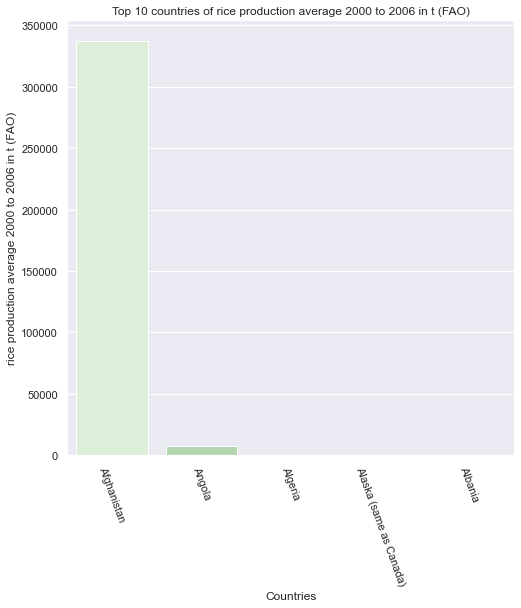

In [42]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_RI2000_10, x='countries', y='RI_2000', palette='Greens')
plt.title('Top 10 countries of rice production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('rice production average 2000 to 2006 in t (FAO)')
plt.show()

In [43]:
rice_path='public/src/components/csv_files/rice_top_ten.csv'
df_RI2000_10.to_csv(rice_path)

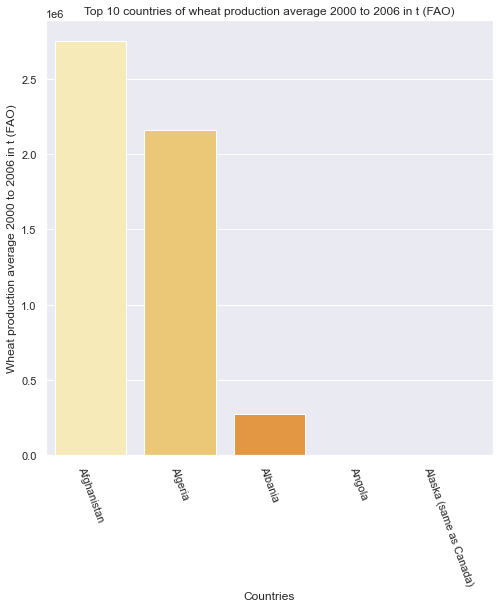

In [44]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_WH2000_10, x='countries', y='WH_2000', palette='YlOrBr')
plt.title('Top 10 countries of wheat production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('Wheat production average 2000 to 2006 in t (FAO)')
plt.show()

In [45]:
wheat_path='public/src/components/csv_files/wheat_top_ten.csv'
df_WH2000_10.to_csv(wheat_path)

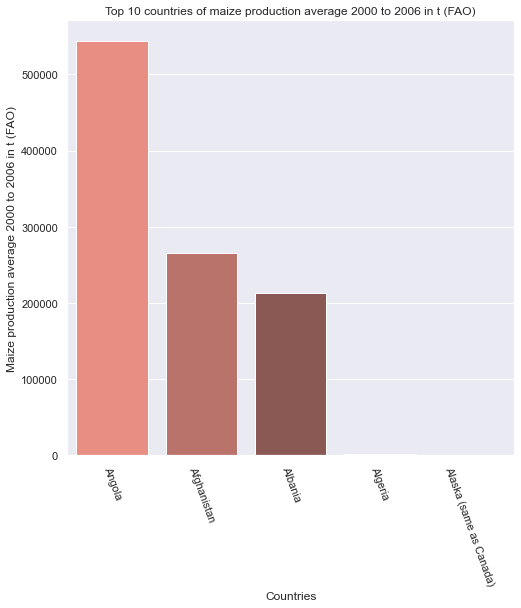

In [46]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_MZ2000_10, x='countries', y='MZ_2000', palette='dark:salmon_r')
plt.title('Top 10 countries of maize production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('Maize production average 2000 to 2006 in t (FAO)')
plt.show()

In [47]:
maize_path='public/src/components/csv_files/maize_top_ten.csv'
df_MZ2000_10.to_csv(maize_path)

# Regression

## Map

In [48]:
m = folium.Map(tiles=None)

In [49]:
wms_url = 'https://sedac.ciesin.columbia.edu/geoserver/wms'

In [50]:
def_layer = 'crop-climate-effects-climate-global-food-production:default'

In [51]:
wheat_layer = 'crop-climate-effects-climate-global-food-production:wheat'
maize_layer = 'crop-climate-effects-climate-global-food-production:maize'
rice_layer = 'crop-climate-effects-climate-global-food-production:rice'

In [52]:
folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=def_layer,
    fmt='image/png',
    name='default',
    overlay=True,
    control=True,
).add_to(m)

In [53]:
folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=wheat_layer,
    fmt='image/png',
    name='wheat',
    overlay=False,
    control=True,
).add_to(m)

folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=maize_layer,
    fmt='image/png',
    name='maize',
    overlay=False,
    control=True,
).add_to(m)

folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=rice_layer,
    fmt='image/png',
    name='rice',
    overlay=False,
    control=True,
).add_to(m)

In [54]:
folium.LayerControl().add_to(m)

In [55]:
m

In [56]:
import os
m.save(os.path.join('map', 'WMS_result.html'))